In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ppe = pd.read_csv("Resources/logistics_ppe.csv")

In [3]:
ppe = ppe.dropna(subset=["quantity_filled", "county", "product_family"])

In [4]:
LA_ppe = ppe.loc[(ppe["county"] == "Los Angeles") | (ppe["county"] == "Orange")]
SF_ppe = ppe.loc[(ppe["county"] == "San Francisco") | (ppe["county"] == "Marin") | (ppe["county"] == "Alameda") | (ppe["county"] == "Contra Costa") | (ppe["county"] == "San Mateo")]

In [5]:
#dates are all over the place, sorting from earliest to latest (low to high)
LA_ppe = LA_ppe.sort_values("as_of_date")
SF_ppe = SF_ppe.sort_values("as_of_date")

In [6]:
#reset the index for the df ordered by date
LA_ppe = LA_ppe.reset_index()
SF_ppe = SF_ppe.reset_index()

In [7]:
#finding the sums for surgical masks over eight two-week periods, stored in a list for later
LA_surgical_one = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-06-08")
                             & (LA_ppe["as_of_date"] <= "2020-06-21")]["quantity_filled"].sum()
LA_surgical_two = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-06-22")
                             & (LA_ppe["as_of_date"] <= "2020-07-05")]["quantity_filled"].sum()
LA_surgical_three = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-07-06")
                             & (LA_ppe["as_of_date"] <= "2020-07-19")]["quantity_filled"].sum()
LA_surgical_four = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-07-20")
                             & (LA_ppe["as_of_date"] <= "2020-08-02")]["quantity_filled"].sum()
LA_surgical_five = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-08-03")
                             & (LA_ppe["as_of_date"] <= "2020-08-16")]["quantity_filled"].sum()
LA_surgical_six = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-08-17")
                             & (LA_ppe["as_of_date"] <= "2020-08-30")]["quantity_filled"].sum()
LA_surgical_seven = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-08-31")
                             & (LA_ppe["as_of_date"] <= "2020-09-13")]["quantity_filled"].sum()
LA_surgical_eight = LA_ppe.loc[(LA_ppe["product_family"] == "Surgical Masks")
                             & (LA_ppe["as_of_date"] >= "2020-09-14")
                             & (LA_ppe["as_of_date"] <= "2020-09-27")]["quantity_filled"].sum()

LA_surgical = [LA_surgical_one, LA_surgical_two, LA_surgical_three, LA_surgical_four,
              LA_surgical_five, LA_surgical_six, LA_surgical_seven, LA_surgical_eight]

In [8]:
SF_surgical_one = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-06-08")
                             & (SF_ppe["as_of_date"] <= "2020-06-21")]["quantity_filled"].sum()
SF_surgical_two = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-06-22")
                             & (SF_ppe["as_of_date"] <= "2020-07-05")]["quantity_filled"].sum()
SF_surgical_three = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-07-06")
                             & (SF_ppe["as_of_date"] <= "2020-07-19")]["quantity_filled"].sum()
SF_surgical_four = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-07-20")
                             & (SF_ppe["as_of_date"] <= "2020-08-02")]["quantity_filled"].sum()
SF_surgical_five = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-08-03")
                             & (SF_ppe["as_of_date"] <= "2020-08-16")]["quantity_filled"].sum()
SF_surgical_six = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-08-17")
                             & (SF_ppe["as_of_date"] <= "2020-08-30")]["quantity_filled"].sum()
SF_surgical_seven = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-08-31")
                             & (SF_ppe["as_of_date"] <= "2020-09-13")]["quantity_filled"].sum()
SF_surgical_eight = SF_ppe.loc[(SF_ppe["product_family"] == "Surgical Masks")
                             & (SF_ppe["as_of_date"] >= "2020-09-14")
                             & (SF_ppe["as_of_date"] <= "2020-09-27")]["quantity_filled"].sum()

SF_surgical = [SF_surgical_one, SF_surgical_two, SF_surgical_three, SF_surgical_four,
              SF_surgical_five, SF_surgical_six, SF_surgical_seven, SF_surgical_eight]

In [10]:
#read in your census work to get population size, then calculate population density value for surgical masks
LASF_census = pd.read_csv("Resources/NEW_LASF_Census2018.csv")
LA_pop = LASF_census.iloc[0,1] + LASF_census.iloc[1,1]
SF_pop = LASF_census.iloc[2,1] + LASF_census.iloc[3,1] + LASF_census.iloc[4,1] + LASF_census.iloc[5,1] + LASF_census.iloc[6,1]

LA_surgicald = (LA_surgical/LA_pop) * 100000
SF_surgicald = (SF_surgical/LA_pop) * 100000

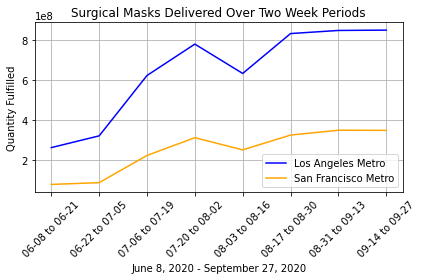

In [14]:
#line chart featuring LA vs SF metro areas, regarding how many surgical masks ordered and fulfilled over two-week periods
date_axis = ["06-08 to 06-21", "06-22 to 07-05", "07-06 to 07-19", "07-20 to 08-02",
             "08-03 to 08-16", "08-17 to 08-30", "08-31 to 09-13", "09-14 to 09-27"]

LA_SM_line, = plt.plot(date_axis, LA_surgical, color="blue", label="Los Angeles Metro")
SF_SM_line, = plt.plot(date_axis, SF_surgical, color="orange", label="San Francisco Metro")
plt.xlabel("June 8, 2020 - September 27, 2020")
plt.ylabel("Quantity Fulfilled")
plt.title("Surgical Masks Delivered Over Two Week Periods")
plt.legend(handles=[LA_SM_line, SF_SM_line], loc="best")
plt.xticks(date_axis, rotation="45")
plt.grid()
plt.tight_layout()
plt.show()

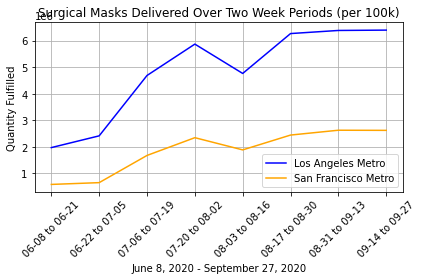

In [15]:
#same chart but done for population density, interesting how similar the graphs look
date_axis = ["06-08 to 06-21", "06-22 to 07-05", "07-06 to 07-19", "07-20 to 08-02",
             "08-03 to 08-16", "08-17 to 08-30", "08-31 to 09-13", "09-14 to 09-27"]

LA_SM_line, = plt.plot(date_axis, LA_surgicald, color="blue", label="Los Angeles Metro")
SF_SM_line, = plt.plot(date_axis, SF_surgicald, color="orange", label="San Francisco Metro")
plt.xlabel("June 8, 2020 - September 27, 2020")
plt.ylabel("Quantity Fulfilled")
plt.title("Surgical Masks Delivered Over Two Week Periods (per 100k)")
plt.legend(handles=[LA_SM_line, SF_SM_line], loc="best")
plt.xticks(date_axis, rotation="45")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#same work as above, for hand sanitizers
LA_handsan_one = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-06-08")
                             & (LA_ppe["as_of_date"] <= "2020-06-21")]["quantity_filled"].sum()
LA_handsan_two = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-06-22")
                             & (LA_ppe["as_of_date"] <= "2020-07-05")]["quantity_filled"].sum()
LA_handsan_three = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-07-06")
                             & (LA_ppe["as_of_date"] <= "2020-07-19")]["quantity_filled"].sum()
LA_handsan_four = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-07-20")
                             & (LA_ppe["as_of_date"] <= "2020-08-02")]["quantity_filled"].sum()
LA_handsan_five = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-08-03")
                             & (LA_ppe["as_of_date"] <= "2020-08-16")]["quantity_filled"].sum()
LA_handsan_six = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-08-17")
                             & (LA_ppe["as_of_date"] <= "2020-08-30")]["quantity_filled"].sum()
LA_handsan_seven = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-08-31")
                             & (LA_ppe["as_of_date"] <= "2020-09-13")]["quantity_filled"].sum()
LA_handsan_eight = LA_ppe.loc[(LA_ppe["product_family"] == "Hand Sanitizers")
                             & (LA_ppe["as_of_date"] >= "2020-09-14")
                             & (LA_ppe["as_of_date"] <= "2020-09-27")]["quantity_filled"].sum()

LA_handsan = [LA_handsan_one, LA_handsan_two, LA_handsan_three, LA_handsan_four,
              LA_handsan_five, LA_handsan_six, LA_handsan_seven, LA_handsan_eight]

In [ ]:
date_axis = ["06-08 to 06-21", "06-22 to 07-05", "07-06 to 07-19", "07-20 to 08-02",
             "08-03 to 08-16", "08-17 to 08-30", "08-31 to 09-13", "09-14 to 09-27"]

#LA_SM_line, = plt.plot(date_axis, LA_surgical, color="blue", label="Surgical Masks")
LA_HS_line, = plt.plot(date_axis, LA_handsan, color="red", label="Hand Sanitizers")
#plt.legend(handles=[LA_SM_line, LA_HS_line], loc="best")
plt.xticks(date_axis, rotation="45")
plt.tight_layout()
plt.show()